In [865]:
import glob
import os
import csv
import numpy as np
import pandas as pd

In [866]:
# CAUTION: Need user input
# metric = 'acc'
metric = 'auc'

# model_init = 'random'
model_init = 'simclr'

exp_prefixes = ["random", "entropy", "margin", "bald", "coreset"]
init_prefixes = ["hard", "easy", "gt_easy", "consistency", "uncertainty", "margin", "bald", "vaal", "coreset"]
# dataset_name = 'BLOODMNIST'
# dataset_name = 'ORGANAMNIST'
dataset_name = 'PATHMNIST'
output_path = './{}/'.format(dataset_name)
model = 'resnet18'
output_file_name = f'{dataset_name}_{model}_{metric}_simclr_ALL.csv' if model_init == 'simclr' else f'{dataset_name}_{model}_{metric}_ALL.csv'
init_num = '20'

In [867]:
exp_list = []
for exp in exp_prefixes:
    for init in init_prefixes:
        if model_init == 'simclr':
            exp_list.extend(glob.glob(os.path.join(output_path, model, 'init_simclr', '{}_{}_{}_*').format(init, init_num, exp)))
        elif model_init == 'random':
            exp_list.extend(glob.glob(os.path.join(output_path, model, '{}_{}_{}_*').format(init, init_num, exp)))
        else:
            print('Wrong initialization of model!')

In [868]:
exp_list[0]

'./PATHMNIST/resnet18/init_simclr/hard_20_random_trial5'

In [869]:
def exp_to_init_method(exp):
    exp = exp.split('/')[-1]
    exp = exp.split('_')[0]+'_'+exp.split('_')[1]

    if 'hard' in exp:
        return 'Hard-to-Contrast'
    elif 'easy' in exp and 'gt' not in exp:
        return 'Easy-to-Contrast'
    elif 'gt_easy' in exp:
        return 'Easy-to-Learn'
    elif 'consistency' in exp:
        return 'Consistency'
    elif 'uncertainty' in exp:
        return 'Entropy'
    elif 'margin' in exp:
        return 'Margin'
    elif 'bald' in exp:
        return 'BALD'
    elif 'vaal' in exp:
        return 'VAAL'
    elif 'coreset' in exp:
        return 'Coreset'
    else:
        return 'Random'

def exp_to_al_method(exp):
    exp = exp.split('_')[-2]

    if 'random' in exp:
        return 'Random'
    elif 'entropy' in exp:
        return 'Entropy'
    elif 'margin' in exp:
        return 'Margin'
    elif 'bald' in exp:
        return 'BALD'
    elif 'coreset' in exp:
        return 'Coreset'
    else:
        return 'Random'

In [870]:
# columns = ['Method', 'Init_Method', 'AL_Method', '0', '1', '2', '3', '4', '5']
columns = ['Method', 'Init_Method', 'AL_Method', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
data = []

In [871]:
for exp in exp_list:
    file_name = 'plot_episode_yvalues.txt' if metric is 'acc' else 'plot_episode_yvalues_auc.txt'
    file_path = os.path.join(exp, file_name)
    file = open(file_path, "r")
    values = file.readlines()
    values = [float(v[:-1]) for v in values]
    if metric is 'auc':
        values = [v * 100 for v in values]
    values.insert(0, exp_to_al_method(exp))
    values.insert(0, exp_to_init_method(exp))
    values.insert(0, f'{exp_to_init_method(exp)}_{exp_to_al_method(exp)}')
    data.append(values)

In [872]:
df = pd.DataFrame(data, columns = columns)

In [873]:
df

,Method,Init_Method,AL_Method,0,1,2,3,4,5,6,7,8,9,10
0,Hard-to-Contrast_Random,Hard-to-Contrast,Random,89.0,82.0,84.0,85.0,83.0,84.0,85.0,84.0,84.0,83.0,87.0
1,Hard-to-Contrast_Random,Hard-to-Contrast,Random,89.0,81.0,84.0,83.0,86.0,88.0,90.0,91.0,91.0,90.0,91.0
2,Hard-to-Contrast_Random,Hard-to-Contrast,Random,89.0,84.0,84.0,84.0,86.0,84.0,87.0,91.0,92.0,91.0,91.0
3,Hard-to-Contrast_Random,Hard-to-Contrast,Random,89.0,88.0,89.0,92.0,88.0,92.0,92.0,94.0,91.0,92.0,92.0
4,Hard-to-Contrast_Random,Hard-to-Contrast,Random,89.0,84.0,84.0,86.0,85.0,88.0,88.0,89.0,90.0,91.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Coreset_Coreset,Coreset,Coreset,77.0,80.0,83.0,84.0,86.0,86.0,86.0,85.0,91.0,90.0,91.0
221,Coreset_Coreset,Coreset,Coreset,77.0,77.0,81.0,85.0,85.0,84.0,84.0,86.0,87.0,88.0,90.0
222,Coreset_Coreset,Coreset,Coreset,77.0,77.0,80.0,80.0,84.0,86.0,88.0,88.0,89.0,89.0,92.0
223,Coreset_Coreset,Coreset,Coreset,77.0,71.0,78.0,81.0,81.0,83.0,84.0,87.0,87.0,90.0,89.0


In [874]:
df.to_csv(f'df_{output_file_name}', index=False)

In [875]:
len(set(df.Method))

45

In [876]:
data2 = []
for exp in exp_list:
    file_name = 'plot_episode_yvalues.txt' if metric is 'acc' else 'plot_episode_yvalues_auc.txt'
    file_path = os.path.join(exp, file_name)
    file = open(file_path, "r")
    values = file.readlines()
    values = [float(v[:-1]) for v in values]
    if metric is 'auc':
        values = [v * 100 for v in values]
    data_tuple = []
    method = f'{exp_to_init_method(exp)}_{exp_to_al_method(exp)}'
    for idx in range(len(values)):
        data_tuple.append([method, exp_to_init_method(exp), exp_to_al_method(exp), idx, values[idx]])
    data2.extend(data_tuple)

In [877]:
df2 = pd.DataFrame(data2, columns=['Method', 'Init_Method', 'AL_Method', 'Episode', 'TestAccuracy'])
df2.Episode = df2.Episode.apply(lambda x: int((x+1)*10))

In [878]:
df2.to_csv(f'df2_{output_file_name}', index=False)

In [879]:
df2

,Method,Init_Method,AL_Method,Episode,TestAccuracy
0,Hard-to-Contrast_Random,Hard-to-Contrast,Random,10,89.0
1,Hard-to-Contrast_Random,Hard-to-Contrast,Random,20,82.0
2,Hard-to-Contrast_Random,Hard-to-Contrast,Random,30,84.0
3,Hard-to-Contrast_Random,Hard-to-Contrast,Random,40,85.0
4,Hard-to-Contrast_Random,Hard-to-Contrast,Random,50,83.0
...,...,...,...,...,...
2470,Coreset_Coreset,Coreset,Coreset,70,85.0
2471,Coreset_Coreset,Coreset,Coreset,80,88.0
2472,Coreset_Coreset,Coreset,Coreset,90,90.0
2473,Coreset_Coreset,Coreset,Coreset,100,90.0


In [880]:
len(df2.Method.unique())

45

In [881]:
data2 = []
for exp in exp_list:
    trial = int(exp[-1])
    file_name = 'plot_episode_yvalues.txt' if metric is 'acc' else 'plot_episode_yvalues_auc.txt'
    file_path = os.path.join(exp, file_name)
    file = open(file_path, "r")
    values = file.readlines()
    values = [float(v[:-1]) for v in values]
    if metric is 'auc':
        values = [v * 100 for v in values]
    data_tuple = []
    method = f'{exp_to_init_method(exp)}_{exp_to_al_method(exp)}'
    for idx in range(len(values)):
        data_tuple.append([method, exp_to_init_method(exp), exp_to_al_method(exp), trial, idx, values[idx]])
    data2.extend(data_tuple)

In [882]:
df3 = pd.DataFrame(data2, columns=['Method', 'Init_Method', 'AL_Method', 'Trial', 'Episode', 'TestAccuracy'])
df3.Episode = df3.Episode.apply(lambda x: int((x+1)*10))

In [883]:
df3.iloc[:20]

,Method,Init_Method,AL_Method,Trial,Episode,TestAccuracy
0,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,10,89.0
1,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,20,82.0
2,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,30,84.0
3,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,40,85.0
4,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,50,83.0
5,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,60,84.0
6,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,70,85.0
7,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,80,84.0
8,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,90,84.0
9,Hard-to-Contrast_Random,Hard-to-Contrast,Random,5,100,83.0


In [884]:
def get_item(pd_series):
    try:
        item = pd_series.item()
    except:
        item = 0
    return item

In [885]:
idxs = df3.Episode.unique()
methods = df3.Method.unique()

data_tuple = []
for method in methods:
    for idx in sorted(idxs):
        data_tuple.append([method, 
            method.split('_')[0], 
            method.split('_')[1], 
            idx, 
            get_item(df3.loc[(df3.Method.isin([method]) & df3.Episode.isin([idx]) & df3.Trial.isin([1])),'TestAccuracy']),
            get_item(df3.loc[(df3.Method.isin([method]) & df3.Episode.isin([idx]) & df3.Trial.isin([2])),'TestAccuracy']),
            get_item(df3.loc[(df3.Method.isin([method]) & df3.Episode.isin([idx]) & df3.Trial.isin([3])),'TestAccuracy']),
            get_item(df3.loc[(df3.Method.isin([method]) & df3.Episode.isin([idx]) & df3.Trial.isin([4])),'TestAccuracy']),
            get_item(df3.loc[(df3.Method.isin([method]) & df3.Episode.isin([idx]) & df3.Trial.isin([5])),'TestAccuracy']),
            ])

In [886]:
df4 = pd.DataFrame(data_tuple, columns=['Method', 'Init_Method', 'AL_Method', 'Episode', 
                                        'run1',
                                        'run2',
                                        'run3',
                                        'run4',
                                        'run5',
                                        ])
df4.Episode = df4.Episode.apply(lambda x: int((x+10)))                                   
df4

,Method,Init_Method,AL_Method,Episode,run1,run2,run3,run4,run5
0,Hard-to-Contrast_Random,Hard-to-Contrast,Random,20,89.0,89.0,89.0,89.0,89.0
1,Hard-to-Contrast_Random,Hard-to-Contrast,Random,30,84.0,84.0,88.0,81.0,82.0
2,Hard-to-Contrast_Random,Hard-to-Contrast,Random,40,84.0,84.0,89.0,84.0,84.0
3,Hard-to-Contrast_Random,Hard-to-Contrast,Random,50,84.0,86.0,92.0,83.0,85.0
4,Hard-to-Contrast_Random,Hard-to-Contrast,Random,60,86.0,85.0,88.0,86.0,83.0
...,...,...,...,...,...,...,...,...,...
490,Coreset_Coreset,Coreset,Coreset,80,84.0,88.0,84.0,86.0,85.0
491,Coreset_Coreset,Coreset,Coreset,90,87.0,88.0,86.0,85.0,88.0
492,Coreset_Coreset,Coreset,Coreset,100,87.0,89.0,87.0,91.0,90.0
493,Coreset_Coreset,Coreset,Coreset,110,90.0,89.0,88.0,90.0,90.0


In [887]:
df4.to_csv(f'df4_{output_file_name}', index=False)

In [888]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# df2 = pd.read_csv("VIKAS_CIFAR10.csv")

In [889]:
len(set(df2.Method))

45

In [890]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('text', usetex=True)

plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["font.weight"] = "normal"

sns.set_style("ticks")

In [891]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

In [892]:
len(set(df2.Init_Method))

9

In [893]:
df2.Init_Method.value_counts()

Hard-to-Contrast    275
Easy-to-Contrast    275
Easy-to-Learn       275
Consistency         275
Entropy             275
Margin              275
BALD                275
VAAL                275
Coreset             275
Name: Init_Method, dtype: int64

In [894]:
len(['black', 'red', 'springgreen',  'dodgerblue', 'peru', 'hotpink', 'blue', 'peru', 'purple'])

9

In [895]:
df2

,Method,Init_Method,AL_Method,Episode,TestAccuracy
0,Hard-to-Contrast_Random,Hard-to-Contrast,Random,10,89.0
1,Hard-to-Contrast_Random,Hard-to-Contrast,Random,20,82.0
2,Hard-to-Contrast_Random,Hard-to-Contrast,Random,30,84.0
3,Hard-to-Contrast_Random,Hard-to-Contrast,Random,40,85.0
4,Hard-to-Contrast_Random,Hard-to-Contrast,Random,50,83.0
...,...,...,...,...,...
2470,Coreset_Coreset,Coreset,Coreset,70,85.0
2471,Coreset_Coreset,Coreset,Coreset,80,88.0
2472,Coreset_Coreset,Coreset,Coreset,90,90.0
2473,Coreset_Coreset,Coreset,Coreset,100,90.0


0


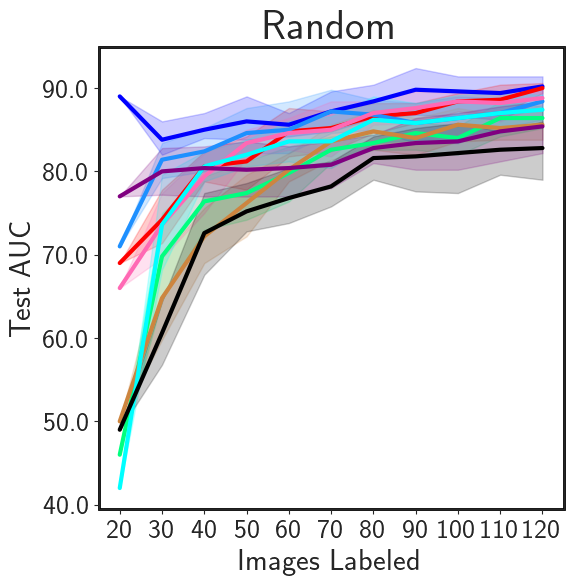

1


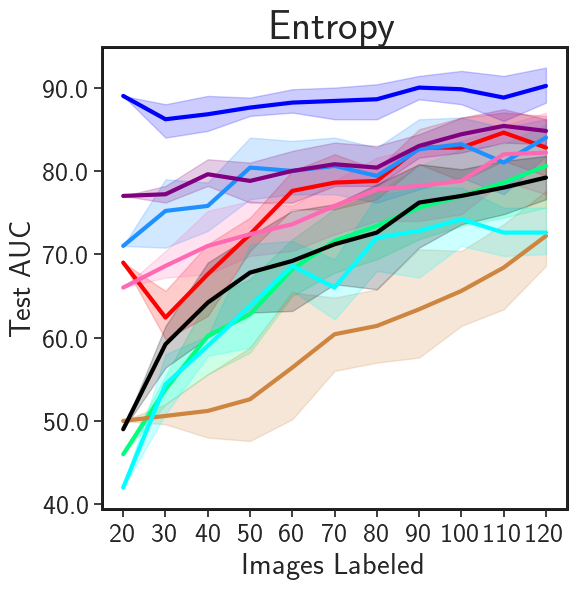

2


In [896]:
al_methods = ['Random','Entropy','Margin','BALD', 'Coreset']
# display_methods= ['Random','Least Confidence (LC)','Max-Entropy (ME)','Min-Margin (MM)', 'ENS-varR','Coreset','VAAL', 'DBAL']
display_methods= al_methods
colors = ['blue', 'red', 'springgreen',  'dodgerblue', 'peru', 'hotpink', 'cyan', 'black', 'purple', 'grey']
colors = colors[:len(set(df2.Init_Method))]

for index in range(len(al_methods)):
    print(index)
#     if index != 6:
#         continue
    fig, ax = plt.subplots(figsize=(6,6))
    al_method = al_methods[index]
    axin2_ylims = {0:[90,91.5],1:[91,93], 2:[91,93], 3:[91,93], 4:[90,93], 5:[91,93], 6:[89,91.5], 7:[91,92]}
    axin_ylims = {0:[73.5,77],1:[74,77], 2:[73.2,77], 3:[73.5,77], 4:[71.9,76], 5:[72.5,77], 6:[73.5,77], 7:[72,76]}

    sns.set(rc={"lines.linewidth": 2})
    sns.set_style("ticks")

    sns.lineplot(x="Episode", y="TestAccuracy", hue="Init_Method", data=df2.loc[df2.AL_Method.isin([al_method]),:], \
                 ax=ax, palette=colors, linewidth = 3, legend=False)
    ax.set_xlabel('Images Labeled', size = 22, fontweight='bold')
    ylabel = 'Test Accuracy' if metric is 'acc' else 'Test AUC'
    ax.set_ylabel(ylabel, size = 22, fontweight='bold')

    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('2')

#     ax.set_xlabel('Labeled %', size = 20)
#     ax.set_ylabel('Test Accuracy', size = 20)
    ax.set_title(display_methods[index], size = 30)
    
    # ax.get_legend().set_title("Initial Pool Sampling Method")
    # plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
    
    # ax.set_yticklabels(ax.get_yticks(), size = 15, fontweight='bold')
    # ax.set_xticklabels(ax.get_xticks(), size = 15, fontweight='bold')

    x_labels = [str(t) for t in np.arange(20,130,10)]
    x_vals = np.arange(10,120,10)

    xticks = ax.set_xticks(x_vals)
    ax.set_xticklabels(x_labels)
    ax.set_xticklabels(x_labels, size = 20)
    # ax.set_xticklabels(ax.get_xticks(), size = 20)
    ax.set_yticklabels(ax.get_yticks(), size = 20)  

    # import pdb; pdb.set_trace()

#     

    # # COMMENT THIS BELOW PORTION AFTER RUNNING IT ONCE
    # ax.legend(loc='upper left', shadow=True, markerscale=1, ncol=1, prop={'size': 25})
    # leg = plt.legend(bbox_to_anchor=(6, 6), loc=2, borderaxespad=0., prop={'size': 25}, markerscale=2)
    # leg.get_frame().set_edgecolor('black')
    # export_legend(leg, "legend.pdf")

    # handles positioning of the zoomed image

    # axins = ax.inset_axes([0.27, 0.1, 0.3, 0.3])

    # # sub region of the original image
    # x1, x2, y1, y2 = 9, 12, axin_ylims[index][0], axin_ylims[index][1]
    # axins.set_xlim(x1, x2)
    # axins.set_ylim(y1, y2)
    # sns.lineplot(x="Episode", y="TestAccuracy", hue="Init_Method", data=df2.loc[df2.AL_Method.isin([al_method]),:], \
    #              ax=axins, legend=False, palette=colors, linewidth = 3)
    # axins.set_xlabel("")
    # axins.set_ylabel("")
    # axins.set_xticklabels('')
    # axins.set_yticklabels([str(round(float(label), 1)) for label in axins.get_yticks()])
    # # axins.set_yticklabels('')
    # axins.patch.set_edgecolor('black')  
    # axins.patch.set_linewidth('1') 
    # axins.tick_params(axis = "x", which = "both", bottom = False, top = False)
    # ax.indicate_inset_zoom(axins, edgecolor="black")

    # #################################################

    # axins2 = ax.inset_axes([0.68, 0.4, 0.3, 0.3])
    # # sub region of the original image
    # x1, x2, y1, y2 = 59, 61, axin2_ylims[index][0], axin2_ylims[index][1]
    # axins2.set_xlim(x1, x2)
    # axins2.set_ylim(y1, y2)
    # ax.indicate_inset_zoom(axins2, edgecolor="black")
    # sns.lineplot(x="Episode", y="TestAccuracy", hue="Init_Method", data=df2.loc[df2.AL_Method.isin([al_method]),:],\
    #              ax=axins2, legend=False, palette=colors, linewidth=3)
    # axins2.set_xlabel("")
    # axins2.set_ylabel("")
    # axins2.set_xticklabels('')
 
    # axins2.set_yticklabels([str(round(float(label), 1)) for label in axins2.get_yticks()])
    # # axins2.set_yticklabels('')
    # axins2.patch.set_edgecolor('black')  
    # axins2.patch.set_linewidth('1')
    # axins2.tick_params(axis = "x", which = "both", bottom = False, top = False)

    # ax.indicate_inset_zoom(axins2, edgecolor="black")


    plt.savefig(f'./figures/{dataset_name}_{al_methods[index]}_{metric}.pdf', dpi=500, format='pdf', bbox_inches = "tight")
    plt.savefig(f'./figures/pngs/{dataset_name}_{al_methods[index]}_{metric}.png', dpi=500, format='png', bbox_inches = "tight")
    
    plt.show()